<a href="https://colab.research.google.com/github/crpytoscooby/College/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
#Load the Data set

adata= pd.read_csv("/content/admission_data (1).csv")

In [3]:
adata

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,0
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,0
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,0
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,0
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
495,Reid Coleman,332,108,5,4.5,4.0,9.02,1,0.87,0
496,Immanuel Holden,337,117,5,5.0,5.0,9.87,1,0.96,0
497,Kaiya Randall,330,120,5,4.5,5.0,9.56,1,0.93,0
498,Dominique Landry,312,103,4,4.0,5.0,8.43,0,0.73,0


In [4]:
print('Dataset length : ',len(adata))
print('Dataset shape : ',adata.shape)

Dataset length :  500
Dataset shape :  (500, 10)


In [5]:
#Finding null values
adata.isnull().sum()

Name                0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
Chance of Admit     0
Unnamed: 9          0
dtype: int64

In [6]:
df=pd.DataFrame(adata)

In [7]:
#Dropping column with null values
df.dropna(how='all', axis='columns',inplace= True)

In [8]:
#Adding of new Attribute based on given condition
df['Admitted'] = [1 if Chance_of_Admit >= 0.89 else 0  for Chance_of_Admit in df['Chance of Admit ']]
df

,Name,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9,Admitted
0,Ethen Koch,337,118,4,4.5,4.5,9.65,1,0.92,0,1
1,Diana Strong,324,107,4,4.0,4.5,8.87,1,0.76,0,0
2,Chasity Esparza,316,104,3,3.0,3.5,8.00,1,0.72,0,0
3,Armando Wallace,322,110,3,3.5,2.5,8.67,1,0.80,0,0
4,Charles Blackwell,314,103,2,2.0,3.0,8.21,0,0.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,Reid Coleman,332,108,5,4.5,4.0,9.02,1,0.87,0,0
496,Immanuel Holden,337,117,5,5.0,5.0,9.87,1,0.96,0,1
497,Kaiya Randall,330,120,5,4.5,5.0,9.56,1,0.93,0,1
498,Dominique Landry,312,103,4,4.0,5.0,8.43,0,0.73,0,0


In [9]:
#Correlation Matrix

corm = df.corr()
corm

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance of Admit,Unnamed: 9,Admitted
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,NaN,0.606016
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,NaN,0.625784
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,NaN,0.550080
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,NaN,0.505556
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,NaN,0.445019
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,NaN,0.648083
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,NaN,0.378798
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,NaN,0.635174
Unnamed: 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Admitted,0.606016,0.625784,0.550080,0.505556,0.445019,0.648083,0.378798,0.635174,NaN,1.000000


In [10]:
#Feature selection
x = df[[ 'GREScore','TOEFLScore','UniversityRating', 'SOP','LOR','CGPA','Research']]
y = df[['Admitted']]

In [11]:
#Splitting Of Dataset in traning and testing dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [12]:
#Perform training with giniIndex and Creating the classifier object
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [13]:
#Perform training with entropy and Creating the classifier object
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [14]:
#Predicton on test with giniIndex
yg_test_pred = clf_gini.predict(x_test)
print("Predicted values:")
print(yg_test_pred)

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0]


In [15]:
yg_train_pred = clf_gini.predict(x_train)
print("Predicted values:")
print(yg_train_pred)

Predicted values:
[0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [16]:
#Prediction on test and test with entropy
y_test_pred = clf_entropy.predict(x_test)
print("Predicted values:")
print(y_test_pred)

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0]


In [17]:
y_train_pred = clf_entropy.predict(x_train)
print("Predicted values:")
print(y_train_pred)

Predicted values:
[0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [18]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ") 
print(confusion_matrix(y_test, y_test_pred)) #entropy based prediction as parameter


Confusion Matrix : 
[[124   2]
 [  3  21]]


In [19]:
#Accuracy
from sklearn.metrics import accuracy_score

print ("Accuracy for training data : ", accuracy_score(y_train,y_train_pred))
print ("Accuracy for testing data : ", accuracy_score(y_test,y_test_pred))


Accuracy for training data :  0.9828571428571429
Accuracy for testing data :  0.9666666666666667


[Text(167.40000000000003, 190.26, 'X[5] <= 9.21\nentropy = 0.641\nsamples = 350\nvalue = [293, 57]'),
 Text(66.96000000000001, 135.9, 'X[1] <= 112.5\nentropy = 0.124\nsamples = 294\nvalue = [289, 5]'),
 Text(33.480000000000004, 81.53999999999999, 'entropy = 0.0\nsamples = 270\nvalue = [270, 0]'),
 Text(100.44000000000001, 81.53999999999999, 'X[3] <= 4.25\nentropy = 0.738\nsamples = 24\nvalue = [19, 5]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(133.92000000000002, 27.180000000000007, 'entropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(267.84000000000003, 135.9, 'X[0] <= 325.0\nentropy = 0.371\nsamples = 56\nvalue = [4, 52]'),
 Text(234.36, 81.53999999999999, 'X[4] <= 4.25\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(267.84000000000003, 27.180000000000007, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(301.320000000

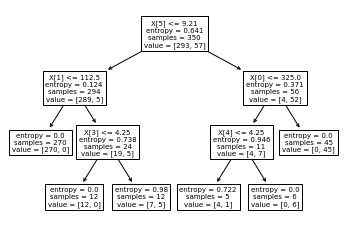

In [20]:
#entropy based visualization of decision tree using plot_tree()
from sklearn import tree

tree.plot_tree(clf_entropy)